In [41]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.python.keras import layers
import keras.backend as KTF
from tensorflow.python.keras import Sequential

In [42]:
import pathlib
data_dir= "C:\\Users\\natlq\\Downloads\\wavespring"
data_dir = pathlib.Path(data_dir)

In [43]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

265


In [44]:
print(list(data_dir.glob('*/*.jpg')))

[WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/154347.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/154726.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/154851.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/154939.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/155038.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/155251.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/155342.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/155441.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/155933.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/160054.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/160217.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/160412.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/160535.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/160658.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/160821.jpg'), WindowsPa

In [45]:
batch_size = 32
img_height = 1600
img_width =1200

In [46]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 275 files belonging to 2 classes.
Using 220 files for training.


In [47]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 275 files belonging to 2 classes.
Using 55 files for validation.


In [48]:
class_names = train_ds.class_names
print(class_names)

['NG', 'OK']


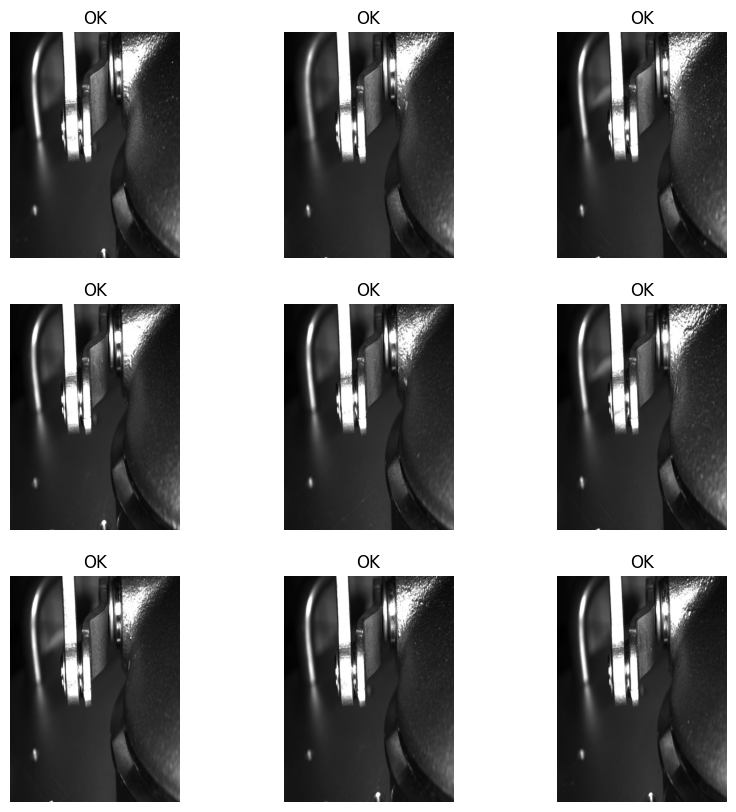

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [50]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 1600, 1200, 3)
(32,)


In [51]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds  = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [52]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [53]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [54]:
num_classes = len(class_names)

model = Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [55]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# def Crop_Pic_Numpy(start_x, start_y, end_x, end_y):
    


In [142]:
data_augmentation = Sequential(
    [
    # tf.keras.layers.RandomFlip("horizontal",
                            #    input_shape=(img_height,
                                            # img_width,
                                            # 3)),
    # tf.keras.layers.RandomRotation(0.1),
    # tf.keras.layers.RandomZoom(height_factor=(-0.7, -0.7))
    # tf.keras.layers.Cropping2D(cropping=((138, (1600-418)),(127, (1200-383))))
    # tf.keras.layers.Cropping2D(cropping=((492, (1600-777)),(372, (1000-711))))
    tf.keras.layers.Cropping2D(cropping=((444, (1600-792)),(372, (1200-717))))
    # tf.keras.layers.Cropping2D(cropping=((int(492/1.6), (int((1600-777)/1.6))),(int(372*1.2), (int((1200-711)*1.2)))))
    ]
)

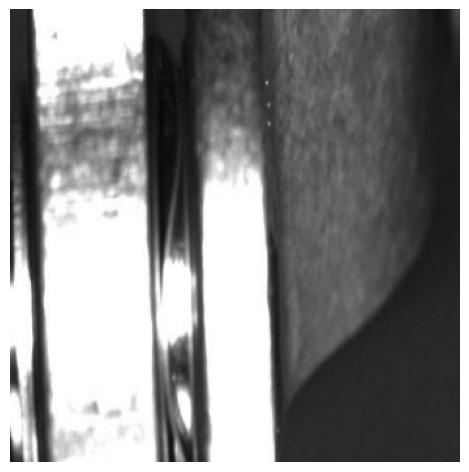

In [162]:
plt.figure(figsize=(20, 20))
for images, _ in train_ds.take(1):
    for i in range(1):
        augmentation_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmentation_images[0].numpy().astype('uint8'))
        plt.axis('off')